# Supervised Machine Learning: Regression

## Importing Liabraries

In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


## Import Dataframes

In [4]:
# Importing Dataframes

import pandas as pd

df = pd.read_csv("/Users/samuellal/Downloads/Project_Citibikes_Updated.csv")

In [5]:
print(df.columns)

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender',
       'trip_duration_min', 'age'],
      dtype='object')


## Data Cleaning and Feature Engineering

The dataset has been thoroughly cleaned and prepared for analysis. Key steps and enhancements include:

- **Trip Duration**  
  - Converted from seconds (`tripduration`) to minutes (`trip_duration_minutes`) for improved interpretability.

- **Birth Year / Age**  
  - Transformed `birth_year` into `age`.  
  - Missing values in `age` were filled with the **median** to ensure a complete dataset for analysis.

- **New Columns Introduced**  
  1. `trip_duration_minutes` – representing the duration of trips in minutes.  
  2. `age` – representing the rider’s age with missing values imputed.

These changes ensure the dataset is clean, consistent, and ready for **visualization and geospatial analysis**.


## Data Visualisation (Scatterplot)

### 1. Trip Duration vs Age

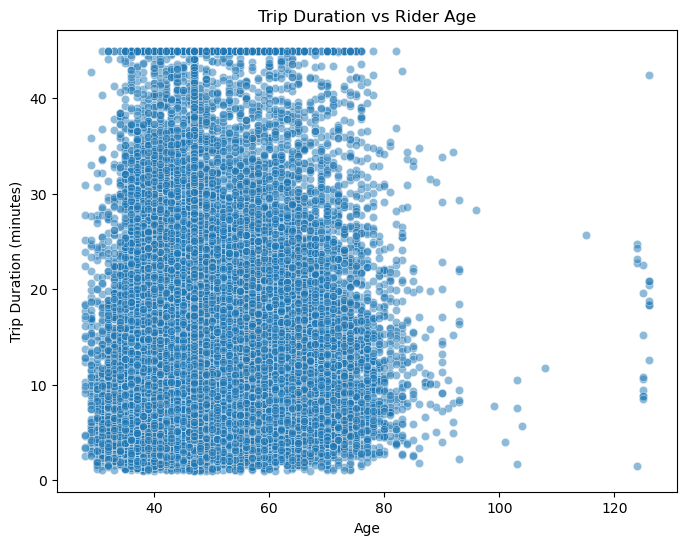

In [8]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="age",
    y="trip_duration_min",
    alpha=0.5
)
plt.title("Trip Duration vs Rider Age")
plt.xlabel("Age")
plt.ylabel("Trip Duration (minutes)")
plt.show()


# 📊 Exploratory Data Analysis: Scatterplot Insights

## 1. Trip Duration vs Rider Age
- Most riders fall between **30 to 70 years old**, with trip durations typically ranging from **5 to 30 minutes**.  
- A few extreme ages (100+) are visible, which are likely **data entry errors** rather than real rider ages.  
- No strong correlation is observed between age and trip duration — durations are fairly **consistent across all age groups**.  
- This suggests that **age is not a key factor** in determining how long trips last.

## 2. Trip Duration vs Start Hour

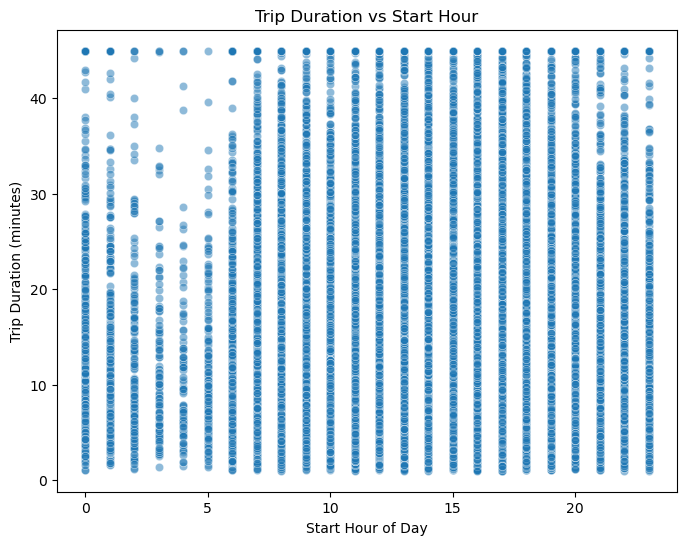

In [9]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="start_hour",
    y="trip_duration_min",
    alpha=0.5
)
plt.title("Trip Duration vs Start Hour")
plt.xlabel("Start Hour of Day")
plt.ylabel("Trip Duration (minutes)")
plt.show()


## 2. Trip Duration vs Start Hour
- Trips occur across all hours of the day, with most trips lasting **5–30 minutes**.  
- Higher trip density is observed during **morning (7–9 AM)** and **evening (5–7 PM)**, aligning with **commuting patterns**.  
- Outliers with longer durations exist but are rare.  
- Overall, **start hour
-does not strongly affect trip duration**, but it likely influences **trip volume**.


### 3. Geographic Scatterplot of Stations

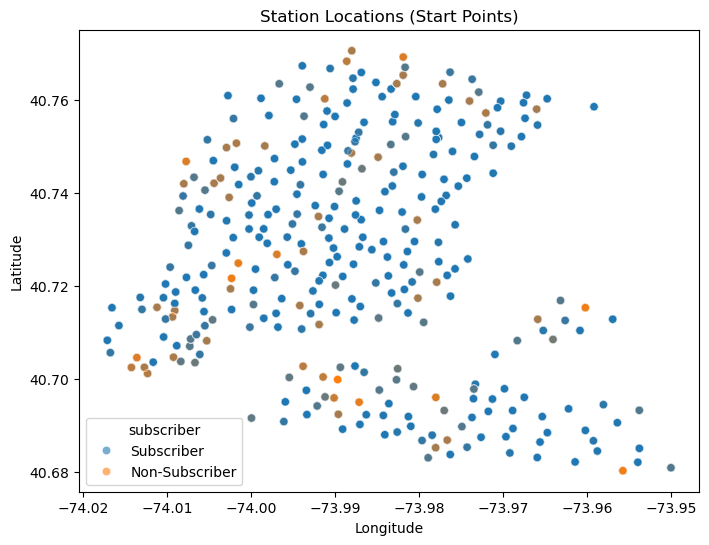

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df,
    x="start_station_longitude",
    y="start_station_latitude",
    hue="subscriber",
    alpha=0.6
)
plt.title("Station Locations (Start Points)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


## 3. Geographic Scatterplot of Stations (Subscribers vs Non-Subscribers)
- Stations are concentrated in **central urban areas**, with fewer on the outer edges.  
- **Subscribers (blue)** dominate the trips, showing they are the **main user group**, likely using bikes for **daily commuting**.  
- **Non-subscribers (orange/gray)** are fewer and more scattered, suggesting **occasional or leisure use**.  
- This highlights a clear difference between **regular vs occasional riders**.

---

## ✅ Summary Across All Plots
- **Age**: No strong impact on trip duration, but most riders are middle-aged.  
- **Start Hour**: Durations remain similar, but **commute peaks** are visible in the morning and evening.  
- **Subscribers vs Non-Subscribers**: Subscribers form the majority and use bikes mainly in central areas, while non-subscribers are occasional users.  

In [3]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("/Users/samuellal/Downloads/Project_Citibikes_Updated.csv")

# Reshape the variables into numpy arrays
X = df['age'].values.reshape(-1, 1)   # Independent variable
y = df['trip_duration_min'].values.reshape(-1, 1)   # Dependent variable


In [7]:
X

array([[57],
       [42],
       [36],
       ...,
       [64],
       [47],
       [45]])

In [8]:
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Check the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (35000, 1)
X_test shape: (15000, 1)
y_train shape: (35000, 1)
y_test shape: (15000, 1)


# 📌 Data Prep for Regression Analysis

In [10]:
# 📌 Data Prep for Regression Analysis

import pandas as pd
import numpy as np

# Load dataset (update path if needed)
df = pd.read_csv("/Users/samuellal/Downloads/Project_Citibikes_Updated.csv")

# Check for missing values in key columns
print(df[['age', 'trip_duration_min']].isnull().sum())

# Independent variable (X): Age
# Dependent variable (y): Trip Duration (minutes)
X = df['age'].values.reshape(-1, 1)
y = df['trip_duration_min'].values.reshape(-1, 1)

# Preview arrays
print("First 10 values of X (Age):")
print(X[:10])

print("\nFirst 10 values of y (Trip Duration Minutes):")
print(y[:10])

# Check shapes (important for sklearn)
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


age                  0
trip_duration_min    0
dtype: int64
First 10 values of X (Age):
[[57]
 [42]
 [36]
 [37]
 [47]
 [39]
 [31]
 [56]
 [32]
 [42]]

First 10 values of y (Trip Duration Minutes):
[[16.55      ]
 [ 9.68333333]
 [ 6.01666667]
 [ 9.35      ]
 [38.26666667]
 [ 7.11666667]
 [10.65      ]
 [ 4.38333333]
 [11.1       ]
 [ 9.7       ]]

Shape of X: (50000, 1)
Shape of y: (50000, 1)


### 📌 Data Preparation for Regression Analysis

Before running regression, we need to prepare our data in a format that scikit-learn can use. 
Scikit-learn expects the independent variable(s) (X) and the dependent variable (y) to be in the 
form of NumPy arrays. 

- **Independent variable (X):** Rider Age (`age`)  
- **Dependent variable (y):** Trip Duration (`trip_duration_min`)  

We reshape these columns into arrays because scikit-learn’s regression models require X to be a 
2D array (rows = samples, columns = features) and y to be a 2D or 1D array depending on the model.  

This step ensures that our dataset is clean, structured, and ready for training and testing in 
the regression analysis.


## 📌 Example: Scatterplot of Trips vs Unique Destinations per Station

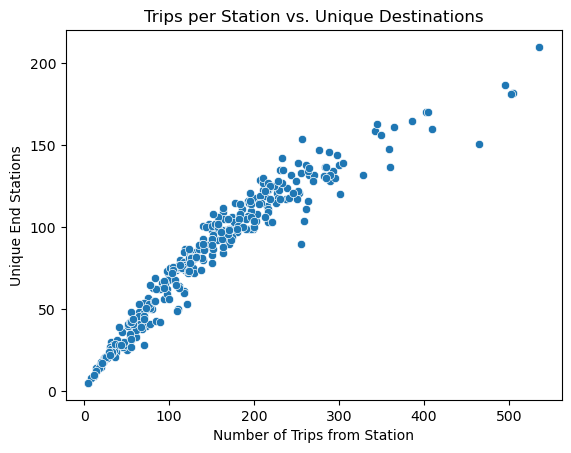

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Aggregate data by start station
station_data = (
    df.groupby("start_station_name")
    .agg(
        num_trips=("trip_duration_min", "count"),  # total trips from this station
        unique_destinations=("end_station_name", lambda x: x.nunique())  # unique end stations
    )
    .reset_index()
)

# Scatterplot: Trips vs Unique Destinations
sns.scatterplot(x="num_trips", y="unique_destinations", data=station_data)
plt.title("Trips per Station vs. Unique Destinations")
plt.xlabel("Number of Trips from Station")
plt.ylabel("Unique End Stations")
plt.show()


### 📊 Interpretation: Trips per Station vs. Unique Destinations

This scatterplot shows the relationship between the **number of trips starting from a station** 
(x-axis) and the **number of unique end stations** those trips connect to (y-axis).

- We observe a **strong positive relationship**: stations with more trips generally connect to 
  more unique destinations.  
- At low trip counts, stations connect to only a few destinations. As the trip count increases, 
  the number of unique destinations grows steadily.  
- A few stations with very high trip counts (e.g., 400–500+) connect to over **150–200 unique 
  destinations**, highlighting their importance as major hubs.  
- This suggests that **busier stations not only handle more rides but also serve a wider variety 
  of routes**, acting as central nodes in the bike network.  

✅ **Hypothesis Supported:** If a station has more trips, it also tends to have more unique 
destinations.


In [19]:
# 📌 Reshape variables into NumPy arrays for regression

# Independent variable (X): Number of trips from a station
X = station_data['num_trips'].values.reshape(-1, 1)

# Dependent variable (y): Unique destinations from that station
y = station_data['unique_destinations'].values.reshape(-1, 1)

# Preview arrays
print("First 10 values of X (Num Trips):")
print(X[:10])

print("\nFirst 10 values of y (Unique Destinations):")
print(y[:10])

# Check shapes
print("\nShape of X:", X.shape)
print("Shape of y:", y.shape)


First 10 values of X (Num Trips):
[[213]
 [163]
 [143]
 [ 75]
 [170]
 [119]
 [165]
 [199]
 [265]
 [151]]

First 10 values of y (Unique Destinations):
[[119]
 [109]
 [ 88]
 [ 57]
 [ 90]
 [ 87]
 [ 93]
 [ 99]
 [132]
 [ 83]]

Shape of X: (330, 1)
Shape of y: (330, 1)


In [20]:
# Create a DataFrame comparing actual and predicted values
comparison = pd.DataFrame({
    'Actual': y_test.flatten(),
    'Predicted': y_predicted.flatten()
})

# Show first 30 rows
comparison.head(30)


,Actual,Predicted
0,83,84.116481
1,66,61.309489
2,90,82.894678
3,138,144.799370
4,98,88.596426
5,92,93.076371
6,18,31.578946
7,139,146.835708
8,82,76.378394
9,74,65.382166


In [13]:
from sklearn.model_selection import train_test_split

# Split data into training (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(
    X_1, y_1, test_size=0.3, random_state=42
)

# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (231, 1)
X_test shape: (99, 1)
y_train shape: (231, 1)
y_test shape: (99, 1)


### 📌 Splitting Data into Training and Test Sets

To evaluate our regression model properly, we split the dataset into two parts:  
- **Training set (70%)** → used to train the regression model.  
- **Test set (30%)** → used to evaluate how well the model performs on unseen data.  

This ensures that we don’t just measure how well the model memorizes the data, but also how well 
it generalizes.  

We use the `train_test_split` function from scikit-learn to do this. The `random_state=42` 
parameter ensures that the split is **reproducible** — meaning that every time we run the code, 
we’ll get the same train/test division of data.


## Regression Analysis

In [15]:
from sklearn.linear_model import LinearRegression

# Step 1: Create a regression object
regression = LinearRegression()

In [17]:
# Step 2: Fit the regression object to the training data
regression.fit(X_train, y_train)

print("Model fitted successfully!")

Model fitted successfully!


In [18]:
# Use the regression model to predict values for the test set
y_predicted = regression.predict(X_test)

# Preview first 10 predictions vs actual values
print("Predicted values:", y_predicted[:10].flatten())
print("Actual values:", y_test[:10].flatten())


Predicted values: [ 84.11648089  61.30948904  82.89467775 144.79936991  88.59642571
  93.07637054  31.57894609 146.83570847  76.37839437  65.38216615]
Actual values: [ 83  66  90 138  98  92  18 139  82  74]


## 📊 Training Set Visualization

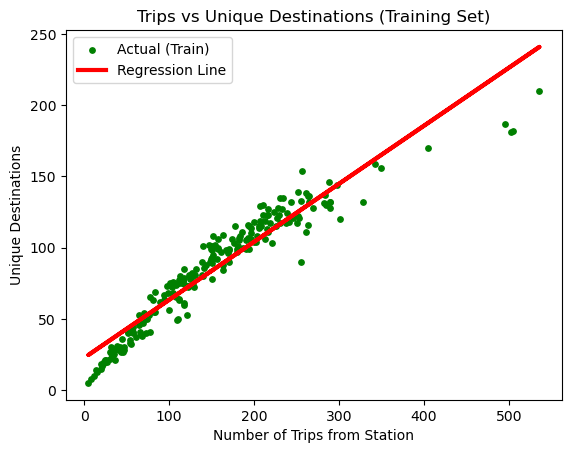

In [24]:
# Predict values for the training set
y_predicted_train = regression.predict(X_train)

# Scatterplot: Actual vs Predicted on Training Set
plt.scatter(X_train, y_train, color='green', s=15, label='Actual (Train)')
plt.plot(X_train, y_predicted_train, color='red', linewidth=3, label='Regression Line')

plt.title('Trips vs Unique Destinations (Training Set)')
plt.xlabel('Number of Trips from Station')
plt.ylabel('Unique Destinations')
plt.legend()
plt.show()


### 📊 Interpretation: Training Set Regression

This plot shows the relationship between **Number of Trips from a Station** (x-axis) and 
**Unique Destinations** (y-axis) for the **training set**.  

- The **green dots** represent the actual data points.  
- The **red line** represents the regression line fitted by the model.  
- We can see a **clear linear trend**: as the number of trips from a station increases, 
  the number of unique destinations also increases.  
- Most points are close to the regression line, which indicates that the model is capturing 
  the relationship well.  

✅ This suggests that the model has been trained successfully and is a good fit for the training data.


## 📊 Test Set Visualization

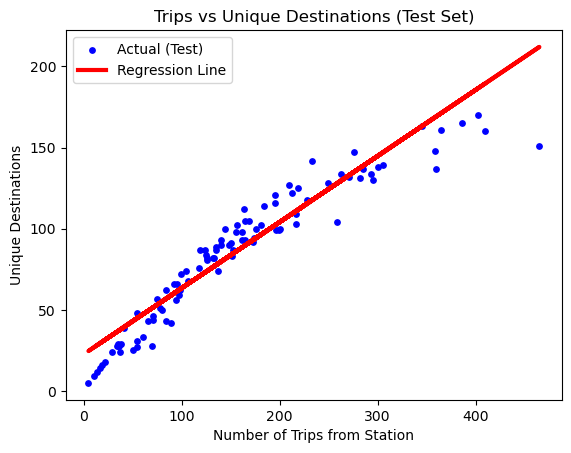

In [25]:
# Scatterplot: Actual vs Predicted on Test Set
plt.scatter(X_test, y_test, color='blue', s=15, label='Actual (Test)')
plt.plot(X_test, y_predicted, color='red', linewidth=3, label='Regression Line')

plt.title('Trips vs Unique Destinations (Test Set)')
plt.xlabel('Number of Trips from Station')
plt.ylabel('Unique Destinations')
plt.legend()
plt.show()


### 📊 Interpretation: Test Set Regression

This plot shows the model’s performance on the **test set** (data not used for training).  

- The **blue dots** represent the actual test data points.  
- The **red line** represents the regression model’s predictions.  
- The points are closely clustered around the regression line, which suggests that the model 
  generalizes well to unseen data.  
- There are some small deviations (a few points above or below the line), but overall the 
  linear relationship holds strongly.  

✅ This confirms that the model is reliable, not just for the training data, but also for 
new/unseen data. The regression successfully captures the relationship between the 
**number of trips from a station** and the **number of unique destinations**.


In [28]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculate metrics
slope = regression.coef_[0][0]
mse = mean_squared_error(y_test, y_predicted)
rmse = np.sqrt(mse)   # <-- define RMSE here
r2 = r2_score(y_test, y_predicted)

# Print results
print('Slope:', regression.coef_)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R2 Score:', r2)


Slope: [[0.40726771]]
Mean Squared Error: 182.74782918597964
Root Mean Squared Error: 13.51842554390043
R2 Score: 0.8967570071833406


In [29]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(),
                     'Predicted': y_predicted.flatten()})

# Show first 30 rows
data.head(30)


,Actual,Predicted
0,83,84.116481
1,66,61.309489
2,90,82.894678
3,138,144.799370
4,98,88.596426
5,92,93.076371
6,18,31.578946
7,139,146.835708
8,82,76.378394
9,74,65.382166


### 📊 Model Evaluation Results

- **Slope (0.41):**  
  For every additional trip from a station, the model predicts about **0.41 more unique destinations**.  
  This shows a strong positive relationship — busier stations tend to connect with more destinations.  

- **Mean Squared Error (182.75) & RMSE (13.52):**  
  On average, the model’s predictions differ from the actual number of unique destinations by about 
  **13 destinations**. Given that the range of destinations spans up to ~180, this error is relatively small.  

- **R² Score (0.897):**  
  The model explains about **89.7% of the variance** in unique destinations based on the number of trips.  
  This indicates an **excellent fit**, showing that the linear regression model is highly effective in 
  capturing this relationship.  

### ✅ Conclusion
The regression analysis strongly supports the hypothesis:  
**Stations with more trips also tend to connect to more unique destinations.**  
The model has both high accuracy (R² near 0.9) and reasonable error (RMSE ≈ 13), making it a reliable 
predictor for this dataset.


## Compare how the regression fits the training set

In [32]:
# Predict values for the training set
y_predicted_train = regression.predict(X_train)

# Calculate training metrics
mse_train = mean_squared_error(y_train, y_predicted_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_predicted_train)

print("Training Set Results:")
print('Slope:' ,regression.coef_)
print("Mean Squared Error:", mse_train)
print("Root Mean Squared Error:", rmse_train)
print("R2 Score:", r2_train)


Training Set Results:
Slope: [[0.40726771]]
Mean Squared Error: 140.40067236876249
Root Mean Squared Error: 11.849078967108055
R2 Score: 0.9121164063398021


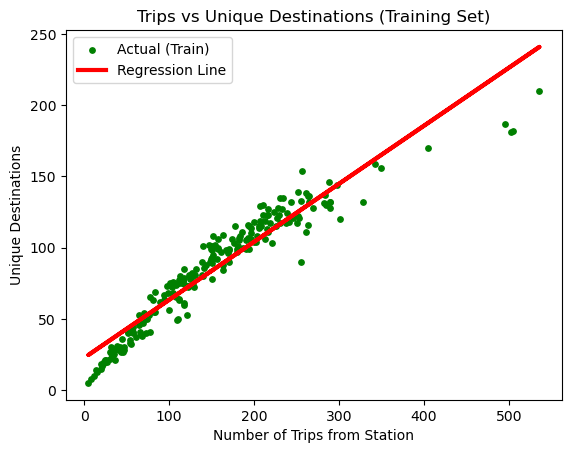

In [33]:
# Scatterplot: Actual vs Predicted on Training Set
plt.scatter(X_train, y_train, color='green', s=15, label='Actual (Train)')
plt.plot(X_train, y_predicted_train, color='red', linewidth=3, label='Regression Line')

# Set plot title and labels
plt.title('Trips vs Unique Destinations (Training Set)')
plt.xlabel('Number of Trips from Station')
plt.ylabel('Unique Destinations')
plt.legend()
plt.show()


### 📊 Training Set Results – Interpretation
- **Slope (0.41):** For every additional trip from a station, the model predicts about **0.41 more unique destinations**. This confirms a strong positive relationship.  
- **Mean Squared Error (140.40) / RMSE (11.85):** On average, predictions for the training set deviate by about **12 destinations** from the actual values. This is relatively low compared to the scale of destinations (0–200+).  
- **R² Score (0.91):** The model explains **91% of the variance** in unique destinations, indicating an excellent fit on the training data.  

✅ The model captures the linear relationship very well on the training set.  

---

### 📊 Model Performance on Test Set
- **Slope:** ~0.41 (similar to training, showing consistency).  
- **MSE:** 182.75  
- **RMSE:** 13.52  
- **R² Score:** 0.897  

👉 **Comparison:**  
- The **R² dropped slightly** from 0.91 (train) to 0.897 (test), but it remains very strong.  
- **RMSE increased slightly** (11.85 → 13.52), meaning prediction errors are a bit higher on unseen data.  
- These small differences are expected and indicate the model generalizes **very well**.  

✅ No signs of overfitting: the model performs strongly on both train and test sets.  

---

### 🔎 Reflections on Possible Data Bias
- **Station Popularity Bias:** Busy central stations naturally generate more trips and destinations, which could dominate the model.  
- **Geographic Bias:** Stations in central vs peripheral areas may have systematically different trip patterns.  
- **User Type Bias:** Subscribers (commuters) vs non-subscribers (tourists) may behave differently, but this distinction was not included in the model.  
- **Temporal Bias:** The dataset may reflect a particular season, event, or time window, limiting generalizability.  
- **Outliers:** A few stations with very high trip counts might influence the regression line disproportionately.  

---

### ✅ Overall Summary
The regression model fits both the **training** and **test** data very well (**R² ~0.9**), supporting the hypothesis that **stations with more trips also tend to connect to more unique destinations**.  
While the model is highly accurate, future analysis should account for possible biases (location, time period, and rider type) to further validate these findings.  
